### Hurricane Categories


Hello, UF team. I decided to go ahead and get you all a dataset containing 

1. Data for all hurricanes
2. Data with the count of forecasts a county was in
3. Data for what category of storm it was

You can find this data on the GitHub: https://github.com/JackOgozaly/Hurricane_Crop_Acreage/blob/main/Data/hurricane_final.csv

You can find the script for how that data was created here:
https://github.com/JackOgozaly/Hurricane_Crop_Acreage/blob/main/hurricane_dataset_040223.py

And this notebook is just going to be a walkthrough of what you have

In [22]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r'https://raw.githubusercontent.com/JackOgozaly/Hurricane_Crop_Acreage/main/Data/hurricane_final.csv')
county_shapes = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_county_500k.zip')

### What's in the Data

In [23]:
print(df.head())

   GEOID hurricane_id  area_34kt  count_34kt_intersects  area_50kt  \
0  37031     AL012004   0.364284                      2        NaN   
1  37055     AL012004   0.577832                      2   0.074296   
2  37095     AL012004   0.157156                      2        NaN   
3  12009     AL032004   0.318716                      2        NaN   
4  12015     AL032004   0.038498                      1        NaN   

   count_50kt_intersects  area_64kt  count_64kt_intersects  area_cat1  \
0                    NaN        NaN                    NaN        NaN   
1                    1.0   0.004551                    1.0        NaN   
2                    NaN        NaN                    NaN        NaN   
3                    NaN        NaN                    NaN        NaN   
4                    NaN        NaN                    NaN        NaN   

   count_cat1_intersects  area_cat2  count_cat2_intersects  area_cat3  \
0                    NaN        NaN                    NaN        N

### Hurricane Categories

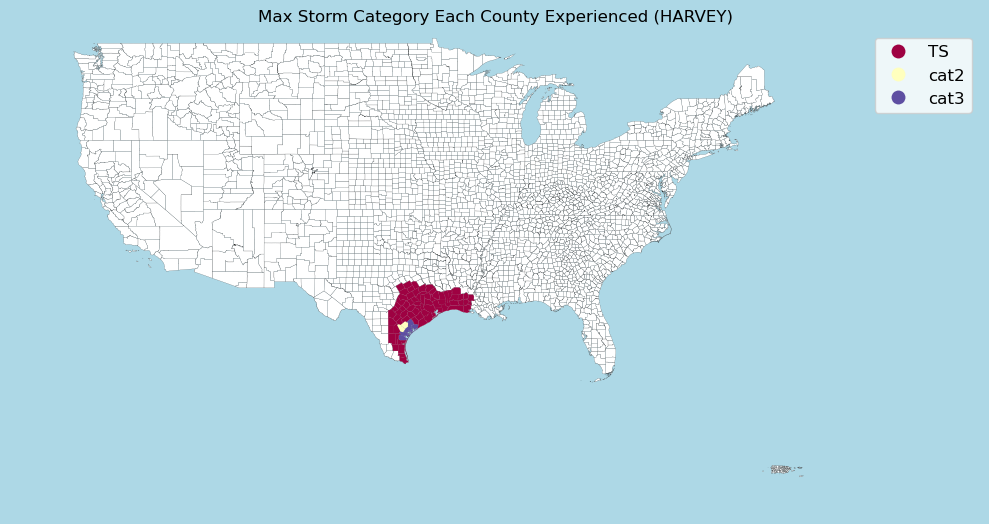

In [31]:
harvey_df = df[df['hurricane_id'] == 'AL092017'].copy()
harvey_df['GEOID'] = harvey_df['GEOID'].astype(str)
harvey_df = pd.merge(county_shapes, harvey_df, how ='inner',
                   on = 'GEOID')

fig, ax = plt.subplots(figsize=(10,8))

#Create our county shapefiles and plot them
counties = gpd.GeoSeries(county_shapes['geometry'])
counties.plot(ax=ax, color='white', edgecolor='black', linewidth= .1)

harvey_df = gpd.GeoDataFrame(harvey_df)
harvey_df.plot(ax=ax, column='hurricane_category', cmap='Spectral', legend=True, 
             categorical=True, legend_kwds=({'fontsize':12}))

plt.title("Max Storm Category Each County Experienced (HARVEY)")
plt.xlim([-130, -50])
plt.ylim([15, 50])
plt.axis('off')
fig.patch.set_facecolor('lightblue')
plt.tight_layout()

### Number of Forecasts

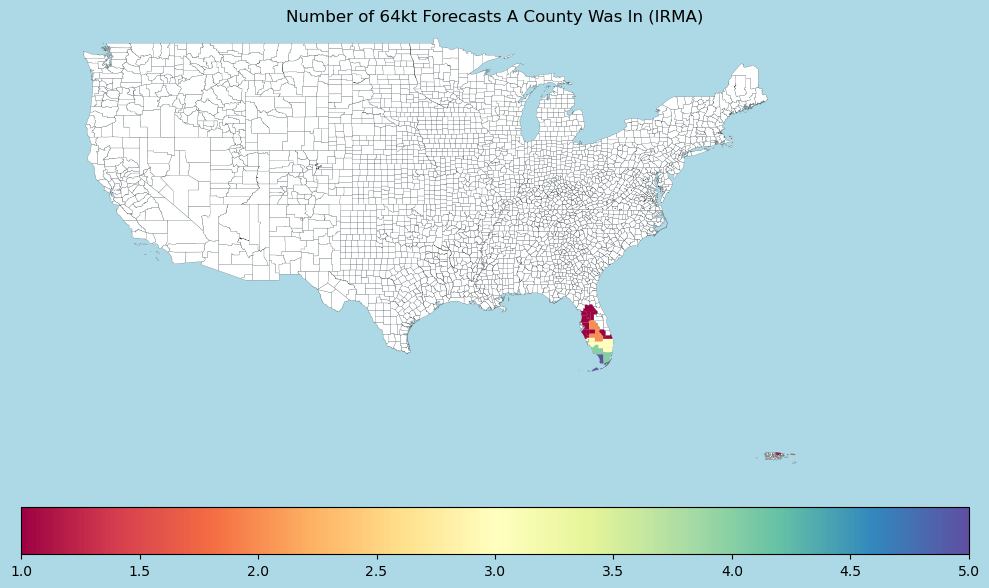

In [33]:
irma_df = df[df['hurricane_id'] == 'AL112017'].copy()
irma_df['GEOID'] = irma_df['GEOID'].astype(str)
irma_df = pd.merge(county_shapes, irma_df, how ='inner',
                   on = 'GEOID')

fig, ax = plt.subplots(figsize=(10,8))

#Create our county shapefiles and plot them
counties = gpd.GeoSeries(county_shapes['geometry'])
counties.plot(ax=ax, color='white', edgecolor='black', linewidth= .1)

irma_df = gpd.GeoDataFrame(irma_df)
irma_df.plot(ax=ax, column='count_64kt_intersects', cmap='Spectral', legend=True,
            legend_kwds={"orientation": "horizontal", "pad": 0.01})

plt.title("Number of 64kt Forecasts A County Was In (IRMA)")
plt.xlim([-130, -50])
plt.ylim([15, 50])
plt.axis('off')
fig.patch.set_facecolor('lightblue')
plt.tight_layout()